In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
# Use Spark to read csv file
SuicideStats = spark.read.csv("data/who_suicide_statistics.csv",inferSchema=True,header=True)

HDIStats = spark.read.csv("data/Human Development Index.csv",inferSchema=True,header=True)

WDIStats = spark.read.csv("data/World_Development_Indicators.csv",inferSchema=True,header=True)

In [3]:
#Data Exploration

#Explore the volumn of the dataset WHO Suicide Statistics
print((SuicideStats.count(), len(SuicideStats.columns)))

(43776, 6)


In [4]:
#Explore the volumn of the dataset Human Development Index
print((HDIStats.count(), len(HDIStats.columns)))

(189, 31)


In [5]:
#Explore the volumn of the dataset World Development Indicators
print((WDIStats.count(), len(WDIStats.columns)))

(6944, 6)


In [6]:
#Explore the data quality of the dataset WHO Suicide Statistics
print(SuicideStats.columns)
SuicideStats.show(6)

['country', 'year', 'sex', 'age', 'suicides_no', 'population']
+-------+----+------+-----------+-----------+----------+
|country|year|   sex|        age|suicides_no|population|
+-------+----+------+-----------+-----------+----------+
|Albania|1985|female|15-24 years|       null|    277900|
|Albania|1985|female|25-34 years|       null|    246800|
|Albania|1985|female|35-54 years|       null|    267500|
|Albania|1985|female| 5-14 years|       null|    298300|
|Albania|1985|female|55-74 years|       null|    138700|
|Albania|1985|female|  75+ years|       null|     34200|
+-------+----+------+-----------+-----------+----------+
only showing top 6 rows



In [7]:
#Explore the data type of the dataset WHO Suicide Statistics
SuicideStats.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)



In [8]:
SuicideStats.select("sex").distinct().show()
SuicideStats.select("age").distinct().show()
print(SuicideStats.select("country").distinct().count())
SuicideStats.select("country").distinct().show()

+------+
|   sex|
+------+
|female|
|  male|
+------+

+-----------+
|        age|
+-----------+
|55-74 years|
|25-34 years|
| 5-14 years|
|  75+ years|
|15-24 years|
|35-54 years|
+-----------+

141
+--------------------+
|             country|
+--------------------+
|            Anguilla|
|            Paraguay|
|          Cabo Verde|
|              Sweden|
|            Kiribati|
|   Republic of Korea|
|              Guyana|
|         Philippines|
|Occupied Palestin...|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|      TFYR Macedonia|
|                Iraq|
|             Germany|
|              Jordan|
|            Maldives|
|              France|
|Turks and Caicos ...|
+--------------------+
only showing top 20 rows



In [9]:
#Explore the general statistics of the dataset WHO Suicide Statistics
SuicideStats.describe().show()

+-------+--------+------------------+------+-----------+-----------------+------------------+
|summary| country|              year|   sex|        age|      suicides_no|        population|
+-------+--------+------------------+------+-----------+-----------------+------------------+
|  count|   43776|             43776| 43776|      43776|            41520|             38316|
|   mean|    null|1998.5024671052631|  null|       null|193.3153901734104|1664091.1353742562|
| stddev|    null|10.338711176746282|  null|       null|800.5899259349637|3647231.2274873867|
|    min| Albania|              1979|female|15-24 years|                0|               259|
|    max|Zimbabwe|              2016|  male|  75+ years|            22338|          43805214|
+-------+--------+------------------+------+-----------+-----------------+------------------+



In [10]:
#Explore the data quality of the dataset Human Development Index
print(HDIStats.columns)
HDIStats.show(6)

['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
+--------+-----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|HDI Rank|          Country| 1990| 1991| 1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014| 2015| 2016| 2017| 2018|
+--------+-----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     170|      Afghanistan|0.298|0.304|0.312|0.308|0.303|0.327|0.331|0.335|0.339|0.343|0.345|0.347|0.378|0.387|  0.4| 0.41|0.419|0.431

In [11]:
#Explore the data type of the dataset Human Development Index
HDIStats.printSchema()

root
 |-- HDI Rank: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- 1990: string (nullable = true)
 |-- 1991: string (nullable = true)
 |-- 1992: string (nullable = true)
 |-- 1993: string (nullable = true)
 |-- 1994: string (nullable = true)
 |-- 1995: string (nullable = true)
 |-- 1996: string (nullable = true)
 |-- 1997: string (nullable = true)
 |-- 1998: string (nullable = true)
 |-- 1999: string (nullable = true)
 |-- 2000: string (nullable = true)
 |-- 2001: string (nullable = true)
 |-- 2002: string (nullable = true)
 |-- 2003: string (nullable = true)
 |-- 2004: string (nullable = true)
 |-- 2005: string (nullable = true)
 |-- 2006: string (nullable = true)
 |-- 2007: string (nullable = true)
 |-- 2008: string (nullable = true)
 |-- 2009: string (nullable = true)
 |-- 2010: string (nullable = true)
 |-- 2011: string (nullable = true)
 |-- 2012: string (nullable = true)
 |-- 2013: string (nullable = true)
 |-- 2014: string (nullable = true)
 |-- 2015: stri

In [12]:
#Explore the general statistics of the dataset Human Development Index
HDIStats.describe().show()

+-------+-----------------+-----------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+
|summary|         HDI Rank|    Country|               1990|              1991|               1992|               1993|               1994|              1995|               1996|              1997|              1998|             1999|               2000|               2001|               2002|              2003|               2004|               2005|              2006|               2007|

In [13]:
#Explore the data quality of the dataset World Development Indicators
print(WDIStats.columns)
WDIStats.show(6)

['Country Name', 'Year', 'Employment to population ratio', 'GDP', 'GDP per capita', 'Gini index']
+------------+----+------------------------------+----+--------------+----------+
|Country Name|Year|Employment to population ratio| GDP|GDP per capita|Gini index|
+------------+----+------------------------------+----+--------------+----------+
| Afghanistan|1985|                          null|null|          null|      null|
| Afghanistan|1986|                          null|null|          null|      null|
| Afghanistan|1987|                          null|null|          null|      null|
| Afghanistan|1988|                          null|null|          null|      null|
| Afghanistan|1989|                          null|null|          null|      null|
| Afghanistan|1990|                          null|null|          null|      null|
+------------+----+------------------------------+----+--------------+----------+
only showing top 6 rows



In [14]:
#Explore the data type of the dataset World Development Indicators
WDIStats.printSchema()

root
 |-- Country Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Employment to population ratio: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- GDP per capita: double (nullable = true)
 |-- Gini index: double (nullable = true)



In [15]:
#Explore the general statistics of the dataset World Development Indicators
WDIStats.describe().show()

+-------+------------+-----------------+------------------------------+--------------------+------------------+-----------------+
|summary|Country Name|             Year|Employment to population ratio|                 GDP|    GDP per capita|       Gini index|
+-------+------------+-----------------+------------------------------+--------------------+------------------+-----------------+
|  count|        6944|             6944|                          4862|                5979|              5976|             1550|
|   mean|        null|           2000.5|              57.6225362242226|2.745890309848958...| 13124.04119241654|38.62148387096775|
| stddev|        null|9.233757553344075|            11.968146617150545|1.111967617317697E12|20099.670239668914|9.432100956926329|
|    min| Afghanistan|             1985|                   26.32999992|       2.144196696E7|       164.1918663|             20.2|
|    max|    Zimbabwe|             2016|                    90.4469986|          1.69723E1

In [16]:
#Explore missing values in the dataset WHO Suicide Statistics
from pyspark.sql.functions import when, count, col

SuicideStats.select([count(when(col(c).isNull(), c)).alias(c) for c in SuicideStats.columns]).show()
SuicideStats.describe().filter(col("summary")  == "count").show()

+-------+----+---+---+-----------+----------+
|country|year|sex|age|suicides_no|population|
+-------+----+---+---+-----------+----------+
|      0|   0|  0|  0|       2256|      5460|
+-------+----+---+---+-----------+----------+

+-------+-------+-----+-----+-----+-----------+----------+
|summary|country| year|  sex|  age|suicides_no|population|
+-------+-------+-----+-----+-----+-----------+----------+
|  count|  43776|43776|43776|43776|      41520|     38316|
+-------+-------+-----+-----+-----+-----------+----------+



In [17]:
from pyspark.sql.functions import when, count, col
#Re-import dataset, taking .. as null value
HDIStats = spark.read.csv("data/Human Development Index.csv",inferSchema=True, header=True, nullValue="..")

#Explore missing values in the dataset World Development Indicators
HDIStats.select([count(when(col(c).isNull(), c)).alias(c) for c in HDIStats.columns]).show()
HDIStats.describe().filter(col("summary")  == "count").show()

+--------+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|HDI Rank|Country|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|
+--------+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|       0|      0|  45|  45|  46|  45|  45|  41|  41|  42|  41|  38|  15|  15|  14|  12|  10|   3|   3|   3|   3|   3|   1|   1|   1|   1|   1|   1|   1|   0|   0|
+--------+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+

+-------+--------+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|summar

In [18]:
#Explore missing values in the dataset World Development Indicators
WDIStats.select([count(when(col(c).isNull(), c)).alias(c) for c in WDIStats.columns]).show()
WDIStats.describe().filter(col("summary")  == "count").show()

+------------+----+------------------------------+---+--------------+----------+
|Country Name|Year|Employment to population ratio|GDP|GDP per capita|Gini index|
+------------+----+------------------------------+---+--------------+----------+
|           0|   0|                          2082|965|           968|      5394|
+------------+----+------------------------------+---+--------------+----------+

+-------+------------+----+------------------------------+----+--------------+----------+
|summary|Country Name|Year|Employment to population ratio| GDP|GDP per capita|Gini index|
+-------+------------+----+------------------------------+----+--------------+----------+
|  count|        6944|6944|                          4862|5979|          5976|      1550|
+-------+------------+----+------------------------------+----+--------------+----------+



In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Explore the extreme values and outliers of the dataset WHO Suicide Statistics
SuicideStats_pd = SuicideStats.toPandas()

SuicideStats_pd.boxplot(column=['suicides_no'])

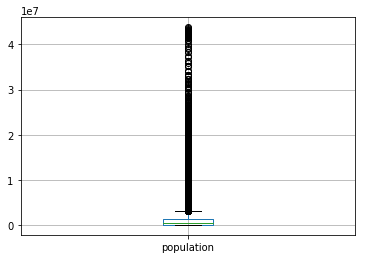

In [20]:
SuicideStats_pd.boxplot(column=['population'])

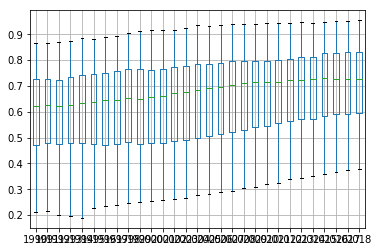

In [21]:
#Explore the extreme values and outliers of the dataset Human Development Index
HDIStats_pd = HDIStats.toPandas()

columns = HDIStats.columns
columns.remove('Country')
columns.remove('HDI Rank')

HDIStats_pd.boxplot(column=columns)


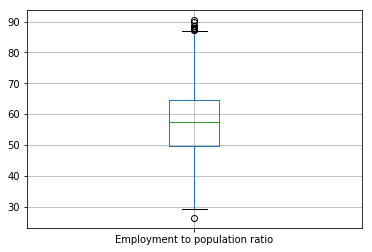

In [22]:
#Explore the extreme values and outliers of the dataset World Development Indicators
WDIStats_pd = WDIStats.toPandas()
WDIStats_pd.boxplot(column=['Employment to population ratio'])

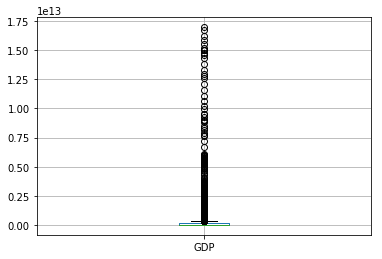

In [23]:
WDIStats_pd.boxplot(column=['GDP'])

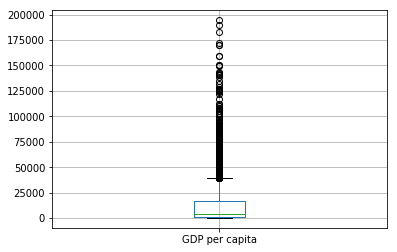

In [24]:
WDIStats_pd.boxplot(column=['GDP per capita'])

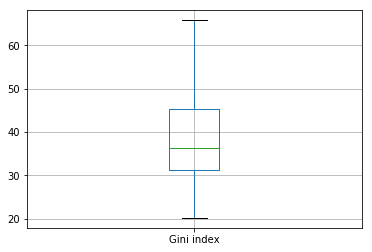

In [25]:
WDIStats_pd.boxplot(column=['Gini index'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9f6b7e48>,
      dtype=object)

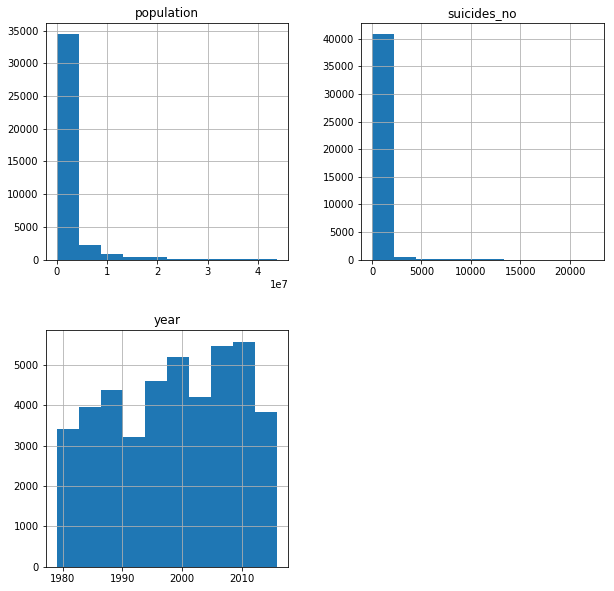

In [26]:
#Explore the data pattern of the dataset WHO Suicide Statistics
SuicideStats_pd.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9e8dd320>,
      dtype=object)

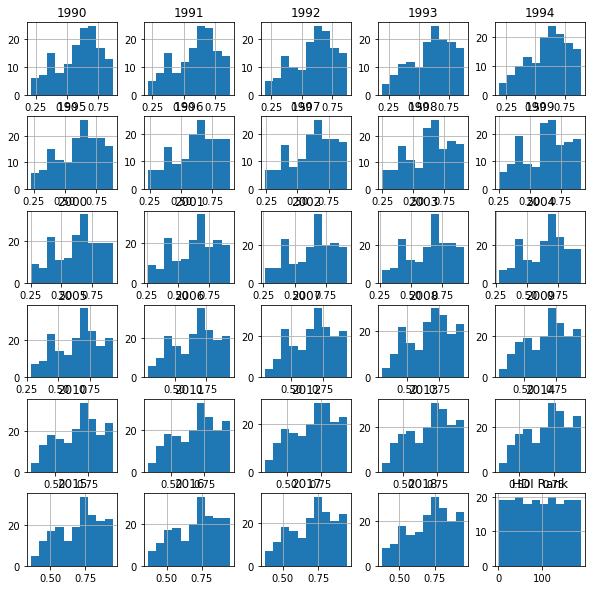

In [27]:
#Explore the data pattern of the dataset Human Development Index
HDIStats_pd.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9e685ac8>,
      dtype=object)

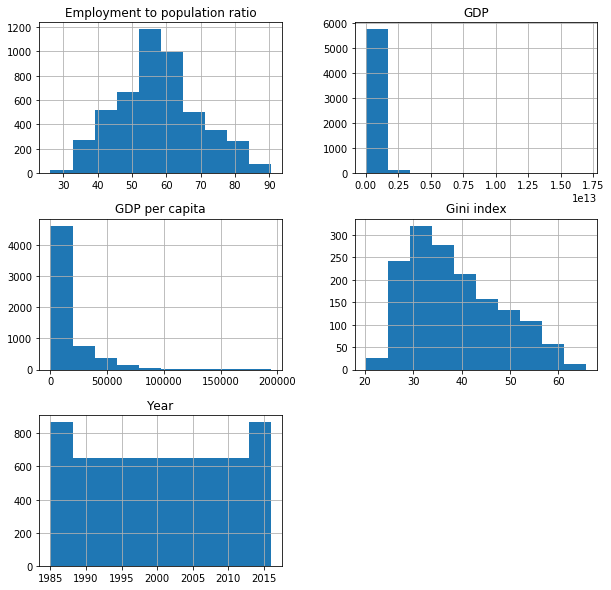

In [28]:
#Explore the data pattern of the dataset World Development Indicators
WDIStats_pd.hist(figsize=(10, 10))

In [29]:
#Data Manipulation
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

#Selecting Items
#select records with populartion greater than 0
print((SuicideStats.count(), len(SuicideStats.columns)))

SuicideStats.createOrReplaceTempView('suicideStats')
SuicideStats = spark.sql("SELECT * FROM suicideStats WHERE population >= 0")
print((SuicideStats.count(), len(SuicideStats.columns)))

(43776, 6)
(38316, 6)


In [30]:
#remove HDI Rank from HDIStats
print((HDIStats.count(), len(HDIStats.columns)))

HDIStats = HDIStats.drop("HDI Rank")

print((HDIStats.count(), len(HDIStats.columns)))

(189, 31)
(189, 30)


In [31]:
HDIStats.show(6)

+-----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|          Country| 1990| 1991| 1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014| 2015| 2016| 2017| 2018|
+-----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|      Afghanistan|0.298|0.304|0.312|0.308|0.303|0.327|0.331|0.335|0.339|0.343|0.345|0.347|0.378|0.387|  0.4| 0.41|0.419|0.431|0.436|0.447|0.464|0.465|0.479|0.485|0.488| 0.49|0.491|0.493|0.496|
|          Albania|0.644|0.625|0.608|0.611|0.617|0.629|0.639|0.639|0.649| 0.66|0.667|0.673| 0.68|0.687|0.692|0.702|0.709|0.718|0.724|0.729| 0.74|0.759|0.771|0.781|0.787|0.788|0.788|0.789|0.791|
|          Algeria|0.578|0.582

In [32]:
#Data cleaning
#remove misssing values from WHO Suicide Statistics
print((SuicideStats.count(), len(SuicideStats.columns)))
SuicideStats = SuicideStats.na.drop(subset="suicides_no")
print((SuicideStats.count(), len(SuicideStats.columns)))

#Display the number of null value in each column after removing missing values
SuicideStats.select([count(when(col(c).isNull(), c)).alias(c) for c in SuicideStats.columns]).show()

(38316, 6)
(36060, 6)
+-------+----+---+---+-----------+----------+
|country|year|sex|age|suicides_no|population|
+-------+----+---+---+-----------+----------+
|      0|   0|  0|  0|          0|         0|
+-------+----+---+---+-----------+----------+



In [33]:
#Calculate mean value of each country

from pyspark.sql.functions import mean

HDIStatsMean = HDIStats.na.fill(0)
HDIStatsMean = HDIStatsMean.select(col('Country'), (sum(col(x) for x in HDIStats.columns[1:]) / len(HDIStats.columns)-1).alias("mean"))

HDIStatsMean.show(6)

+-----------------+--------------------+
|          Country|                mean|
+-----------------+--------------------+
|      Afghanistan| -0.6149666666666667|
|          Albania|-0.32346666666666657|
|          Algeria|              -0.346|
|          Andorra| -0.4764666666666667|
|           Angola| -0.6722333333333333|
|AntiguaandBarbuda|             -0.6392|
+-----------------+--------------------+
only showing top 6 rows



In [34]:
HDIStats = HDIStats.alias('a')\
    .join(HDIStatsMean.alias('b'),col('b.Country') == col('a.Country'))\
    .select([when(col('a.'+xx).isNull(), col('b.mean')).otherwise(col('a.'+xx)).alias(xx) for xx in HDIStats.columns])

#Display the number of null value in each column after removing missing values
HDIStats.select([count(when(col(c).isNull(), c)).alias(c) for c in HDIStats.columns]).show()


+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Country|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|      0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+



In [35]:
#cleanig WDIStats
#replace missing value with the mean value of this country
from pyspark.sql.functions import avg

WDIStats.select([count(when(col(c).isNull(), c)).alias(c) for c in WDIStats.columns]).show()

def fill_with_mean(df, exclude=set()): 
    stats = df.agg(*(
        avg(c).alias(c) for c in df.columns if c not in exclude
    ))
    return df.na.fill(stats.first().asDict())

WDIStats = fill_with_mean(WDIStats, ["Country Name", "Year"])

WDIStats.select([count(when(col(c).isNull(), c)).alias(c) for c in WDIStats.columns]).show()

+------------+----+------------------------------+---+--------------+----------+
|Country Name|Year|Employment to population ratio|GDP|GDP per capita|Gini index|
+------------+----+------------------------------+---+--------------+----------+
|           0|   0|                          2082|965|           968|      5394|
+------------+----+------------------------------+---+--------------+----------+

+------------+----+------------------------------+---+--------------+----------+
|Country Name|Year|Employment to population ratio|GDP|GDP per capita|Gini index|
+------------+----+------------------------------+---+--------------+----------+
|           0|   0|                             0|  0|             0|         0|
+------------+----+------------------------------+---+--------------+----------+



In [36]:
#remove extreme and outliers
from pyspark.sql import DataFrameStatFunctions

print((SuicideStats.count(), len(SuicideStats.columns)))

bounds = {
    c: dict(
        zip(["q1", "q3"], SuicideStats.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in SuicideStats.columns if c in ["suicides_no", "population"]
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)

SuicideStats = SuicideStats.select(
    "*",
    *[
        when(
            col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in SuicideStats.columns  if c in ["suicides_no", "population"]
    ]
)

SuicideStats.createOrReplaceTempView('SuicideStats')
SuicideStats = spark.sql("SELECT country, year, sex, age, suicides_no, population FROM SuicideStats WHERE suicides_no_out = 0 and population_out=0 ")
print((SuicideStats.count(), len(SuicideStats.columns)))



(36060, 6)
(28783, 6)


In [37]:
#Construct the Data
#add new feature suicidePer100k to SuicideStats

SuicideStats = SuicideStats.withColumn("SuicidePer100k", col("suicides_no")/col("population")*100000)

print((SuicideStats.count(), len(SuicideStats.columns)))
SuicideStats.show(6)

(28783, 7)
+-------+----+------+-----------+-----------+----------+------------------+
|country|year|   sex|        age|suicides_no|population|    SuicidePer100k|
+-------+----+------+-----------+-----------+----------+------------------+
|Albania|1987|female|15-24 years|         14|    289700|4.8325854332067655|
|Albania|1987|female|25-34 years|          4|    257200|1.5552099533437014|
|Albania|1987|female|35-54 years|          6|    278800|2.1520803443328553|
|Albania|1987|female| 5-14 years|          0|    311000|               0.0|
|Albania|1987|female|55-74 years|          0|    144600|               0.0|
|Albania|1987|female|  75+ years|          1|     35600| 2.808988764044944|
+-------+----+------+-----------+-----------+----------+------------------+
only showing top 6 rows



In [38]:
#transport HDI score 
#HDIStats.columns
from pyspark.sql.functions import array, col, explode, struct, lit

HDIStats.show(3)

cols, dtypes = zip(*((c, t) for (c, t) in HDIStats.dtypes if c not in ['Country']))
kvs = explode(array([
      struct(lit(c).alias("Year"), col(c).alias("HDIScore")) for c in cols
    ])).alias("kvs")
    
HDIStats = HDIStats.select(['Country'] + [kvs]).select(['Country'] + ["kvs.Year", "kvs.HDIScore"])
HDIStats.show(6)


+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    Country| 1990| 1991| 1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014| 2015| 2016| 2017| 2018|
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|Afghanistan|0.298|0.304|0.312|0.308|0.303|0.327|0.331|0.335|0.339|0.343|0.345|0.347|0.378|0.387|  0.4| 0.41|0.419|0.431|0.436|0.447|0.464|0.465|0.479|0.485|0.488| 0.49|0.491|0.493|0.496|
|    Albania|0.644|0.625|0.608|0.611|0.617|0.629|0.639|0.639|0.649| 0.66|0.667|0.673| 0.68|0.687|0.692|0.702|0.709|0.718|0.724|0.729| 0.74|0.759|0.771|0.781|0.787|0.788|0.788|0.789|0.791|
|    Algeria|0.578|0.582|0.589|0.593|0.597|0.602| 0.61|0.619

In [39]:
#Integrate Data Sources

#rename columns
SuicideStats = SuicideStats.withColumnRenamed("country","Country")\
    .withColumnRenamed("year","Year")\
    .withColumnRenamed("sex","Sex")\
    .withColumnRenamed("age","Age")\
    .withColumnRenamed("suicides_no","SuicidesNo")\
    .withColumnRenamed("population","Population")

WDIStats = WDIStats.withColumnRenamed("Country Name","Country")\
    .withColumnRenamed("Employment to population ratio","EmploymentToPopulationRatio")\
    .withColumnRenamed("GDP per capita","GDPPerCapita")\
    .withColumnRenamed("Gini index","GiniIndex")


In [40]:
#merge data to a single data frame
datasource = SuicideStats\
    .join(HDIStats, (SuicideStats.Country == HDIStats.Country) & (SuicideStats.Year == HDIStats.Year))\
    .join(WDIStats, (SuicideStats.Country == WDIStats.Country) & (SuicideStats.Year == WDIStats.Year))\
    .select([SuicideStats.Country, SuicideStats.Year, SuicideStats.Sex, SuicideStats.Age, SuicideStats.SuicidesNo,
             SuicideStats.Population, SuicideStats.SuicidePer100k, HDIStats.HDIScore,
             WDIStats.EmploymentToPopulationRatio, WDIStats.GDP, WDIStats.GDPPerCapita, WDIStats.GiniIndex])

print((datasource.count(), len(datasource.columns)))
datasource.show(6)

(17665, 12)
+-------+----+----+-----------+----------+----------+------------------+--------+---------------------------+-------------+------------+-----------------+
|Country|Year| Sex|        Age|SuicidesNo|Population|    SuicidePer100k|HDIScore|EmploymentToPopulationRatio|          GDP|GDPPerCapita|        GiniIndex|
+-------+----+----+-----------+----------+----------+------------------+--------+---------------------------+-------------+------------+-----------------+
|Albania|1992|male|  75+ years|         0|     23900|               0.0|   0.608|                54.30599976|4.038036613E9| 1243.605824|38.62148387096775|
|Albania|1992|male|55-74 years|         5|    159500| 3.134796238244514|   0.608|                54.30599976|4.038036613E9| 1243.605824|38.62148387096775|
|Albania|1992|male| 5-14 years|         0|    362900|               0.0|   0.608|                54.30599976|4.038036613E9| 1243.605824|38.62148387096775|
|Albania|1992|male|35-54 years|        12|    343800|3.490

In [41]:
datasource.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SuicidesNo: integer (nullable = true)
 |-- Population: integer (nullable = true)
 |-- SuicidePer100k: double (nullable = true)
 |-- HDIScore: double (nullable = true)
 |-- EmploymentToPopulationRatio: double (nullable = false)
 |-- GDP: double (nullable = false)
 |-- GDPPerCapita: double (nullable = false)
 |-- GiniIndex: double (nullable = false)



In [43]:
#drop some columns
datasource = datasource.drop('SuicidesNo')\
    .drop('Population')\
    .drop('Year')

datasource.columns

['Country',
 'Sex',
 'Age',
 'SuicidePer100k',
 'HDIScore',
 'EmploymentToPopulationRatio',
 'GDP',
 'GDPPerCapita',
 'GiniIndex']

In [44]:
#Reduce the data
#todo explore feature importance

from pyspark.mllib.stat import Statistics
import pandas as pd

num_cols = ['SuicidePer100k', 'HDIScore', 'EmploymentToPopulationRatio', 'GDP', 'GDPPerCapita', 'GiniIndex']
corr_data = datasource.select(num_cols)

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                             SuicidePer100k  HDIScore  EmploymentToPopulationRatio       GDP  GDPPerCapita  GiniIndex
SuicidePer100k                     1.000000  0.057071                    -0.123945 -0.038114      0.018473  -0.086211
HDIScore                           0.057071  1.000000                     0.081580  0.232663      0.397210  -0.177384
EmploymentToPopulationRatio       -0.123945  0.081580                     1.000000 -0.004968      0.304773   0.080473
GDP                               -0.038114  0.232663                    -0.004968  1.000000      0.395178  -0.153961
GDPPerCapita                       0.018473  0.397210                     0.304773  0.395178      1.000000  -0.406594
GiniIndex                         -0.086211 -0.177384                     0.080473 -0.153961     -0.406594   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9c1260b8>,
      dtype=object)

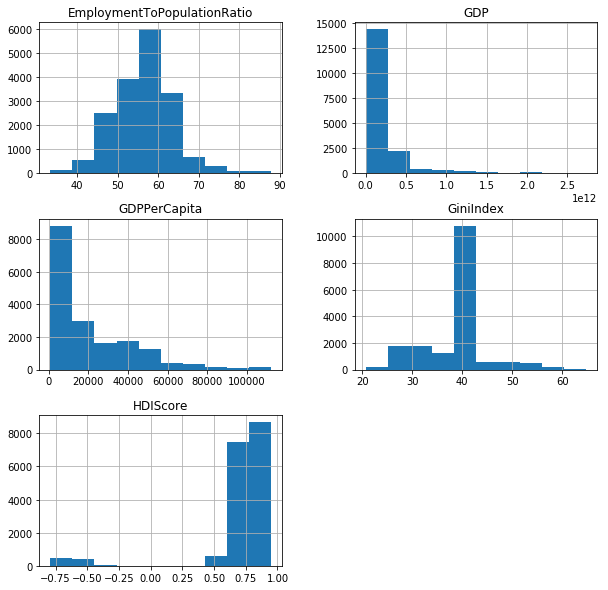

In [45]:
#Project the data
datasource_pd = datasource.toPandas()

datasource_pd.hist(figsize=(10, 10), column=['HDIScore', 'EmploymentToPopulationRatio', 'GDP',
 'GDPPerCapita', 'GiniIndex'])

In [46]:
from pyspark.sql.functions import log

datasource = datasource.withColumn("LogGDPPerCapita", log("GDPPerCapita")).withColumn("LogGDP", log("GDP"))

In [47]:
datasource.persist()

DataFrame[Country: string, Sex: string, Age: string, SuicidePer100k: double, HDIScore: double, EmploymentToPopulationRatio: double, GDP: double, GDPPerCapita: double, GiniIndex: double, LogGDPPerCapita: double, LogGDP: double]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9a67c128>,
      dtype=object)

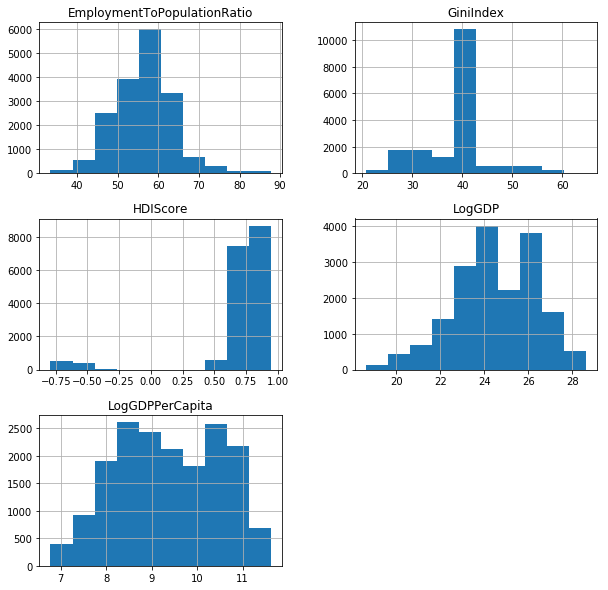

In [48]:
datasource_pd = datasource.toPandas()
datasource_pd.hist(figsize=(10, 10), column=['HDIScore', 'EmploymentToPopulationRatio', 'LogGDP',
 'LogGDPPerCapita', 'GiniIndex'])

In [49]:
#Train and Test Split
# Split the data
(train, test) = datasource.randomSplit([0.7, 0.3], seed =722)
print("The size of dataset is: ",(datasource.count(), len(datasource.columns)))
print("The size of training data is: ", (train.count(), len(train.columns)))
print("The size of test data is: ", (test.count(), len(test.columns)))

The size of dataset is:  (17665, 11)
The size of training data is:  (12335, 11)
The size of test data is:  (5330, 11)


In [50]:
# casts all columns to a numeric type
from pyspark.ml.feature import StringIndexer

sexIndexer = StringIndexer(inputCol="Sex", outputCol="SexIndex")
ageIndexer = StringIndexer(inputCol="Age", outputCol="AgeIndex")


In [51]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer

featuresCols = ['HDIScore', 'EmploymentToPopulationRatio', 'LogGDPPerCapita', 'LogGDP', 'GiniIndex', 'SexIndex', 'AgeIndex']
featureAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
featureIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="indexedFeatures", maxCategories=4)


In [52]:
from pyspark.ml.regression import GBTRegressor

# Takes the "features" column and learns to predict "SuicidePer100k"
gbt = GBTRegressor(featuresCol="indexedFeatures",labelCol="SuicidePer100k", maxIter=5, maxDepth=5)


In [53]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[sexIndexer, ageIndexer, featureAssembler, featureIndexer, gbt])

pipelineModel = pipeline.fit(train)

In [54]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.  In practice, to get the highest accuracy, you would likely want to try deeper trees (10 or higher) and more trees in the ensemble (>100)
#paramGrid = ParamGridBuilder()\
#  .addGrid(gbt.maxDepth, [2, 5])\
#  .addGrid(gbt.maxIter, [2, 5])\
#  .build()

# We define an evaluation metric.  This tells CrossValidator how well we are doing by comparing the true labels with predictions.
#evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())

# Declare the CrossValidator, which runs model tuning for us.
#cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [55]:
predictions = pipelineModel.transform(test)
display(predictions.select("SuicidePer100k", "prediction", *featuresCols))

DataFrame[SuicidePer100k: double, prediction: double, HDIScore: double, EmploymentToPopulationRatio: double, LogGDPPerCapita: double, LogGDP: double, GiniIndex: double, SexIndex: double, AgeIndex: double]

In [56]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="SuicidePer100k", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1035, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 883, in send_command
    response = connection.send_command(command)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1040, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
Traceback (most recent call last):
  File "/usr/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, 

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33494)
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4ec064e6a364>", line 4, in <module>
    rmse = evaluator.evaluate(predictions)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 69, in evaluate
    return self._evaluate(dataset)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/ml/evaluation.py", line 99, in _evaluate
    return self._java_obj.evaluate(dataset._jdf)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 54388)
----------------------------------------


Py4JError: An error occurred while calling o1393.evaluate

In [42]:
gbt = GBTRegressor(featuresCol="indexedFeatures",labelCol="SuicidePer100k", maxIter=5, maxDepth=9)

pipeline = Pipeline(stages=[sexIndexer, ageIndexer, featureAssembler, featureIndexer, gbt])

pipelineModel = pipeline.fit(train)

predictions = pipelineModel.transform(test)
display(predictions.select("SuicidePer100k", "prediction", *featuresCols))
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="SuicidePer100k", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

DataFrame[SuicidePer100k: double, prediction: double, HDIScore: double, EmploymentToPopulationRatio: double, LogGDPPerCapita: double, LogGDP: double, GiniIndex: double, SexIndex: double, AgeIndex: double]

Root Mean Squared Error (RMSE) on test data = 9.84694


In [43]:
gbt = GBTRegressor(featuresCol="indexedFeatures",labelCol="SuicidePer100k", maxIter=5, maxDepth=12)

pipeline = Pipeline(stages=[sexIndexer, ageIndexer, featureAssembler, featureIndexer, gbt])

pipelineModel = pipeline.fit(train)

predictions = pipelineModel.transform(test)
display(predictions.select("SuicidePer100k", "prediction", *featuresCols))
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="SuicidePer100k", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


DataFrame[SuicidePer100k: double, prediction: double, HDIScore: double, EmploymentToPopulationRatio: double, LogGDPPerCapita: double, LogGDP: double, GiniIndex: double, SexIndex: double, AgeIndex: double]

Root Mean Squared Error (RMSE) on test data = 9.14238


In [45]:
gbt = GBTRegressor(featuresCol="indexedFeatures",labelCol="SuicidePer100k", maxIter=5, maxDepth=13)

pipeline = Pipeline(stages=[sexIndexer, ageIndexer, featureAssembler, featureIndexer, gbt])

pipelineModel = pipeline.fit(train)

predictions = pipelineModel.transform(test)
display(predictions.select("SuicidePer100k", "prediction", *featuresCols))
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="SuicidePer100k", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


DataFrame[SuicidePer100k: double, prediction: double, HDIScore: double, EmploymentToPopulationRatio: double, LogGDPPerCapita: double, LogGDP: double, GiniIndex: double, SexIndex: double, AgeIndex: double]

Root Mean Squared Error (RMSE) on test data = 9.36487


In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 15])\
  .addGrid(gbt.maxIter, [2, 15])\
  .build()

evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())

cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

pipeline = Pipeline(stages=[sexIndexer, ageIndexer, featureAssembler, featureIndexer, cv])

pipelineModel = pipeline.fit(train)

